In [13]:
# Heart Rate Analysi

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [15]:
# Load data
heartrate_df = pd.read_csv('Downloads/heartrate.csv')
heartrate_df['datetime'] = pd.to_datetime(heartrate_df['datetime'], format='%d/%m/%y %H:%M')

In [16]:
# Set datetime as index
heartrate_df.set_index('datetime', inplace=True)

In [20]:
# Handle missing values
heartrate_df['heartrate'].interpolate(method='time', inplace=True)

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(heartrate_df['heartrate'], model='additive', period=1440)  # Assuming daily seasonality
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

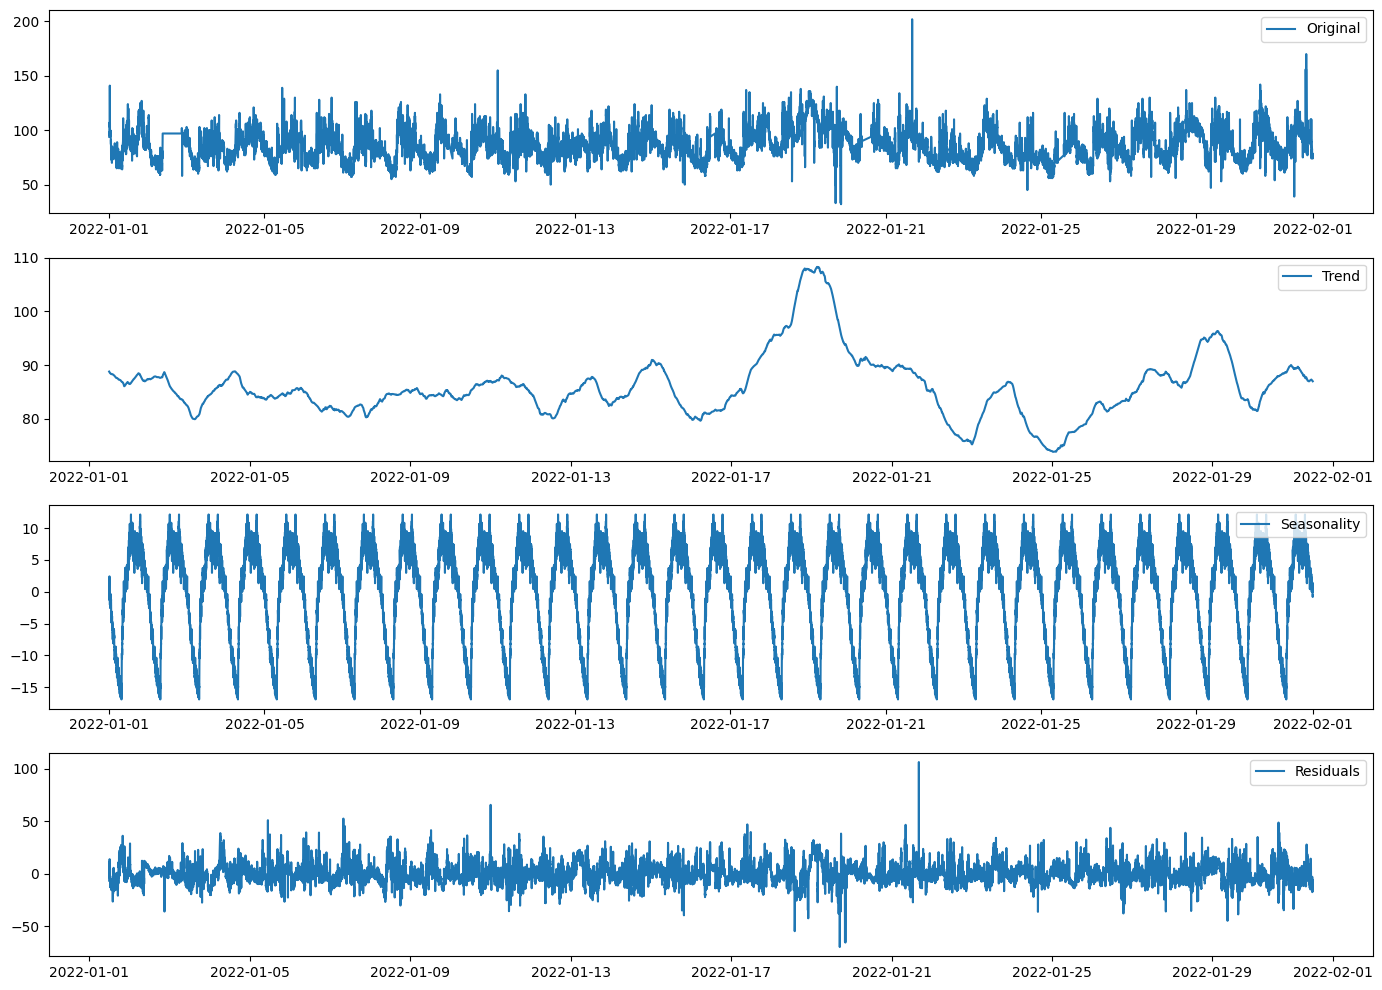

In [23]:
# Plot decomposition
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(heartrate_df['heartrate'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [24]:
# Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
heartrate_df['anomaly'] = iso_forest.fit_predict(heartrate_df[['heartrate']])

# Mark anomalies
anomalies = heartrate_df[heartrate_df['anomaly'] == -1]

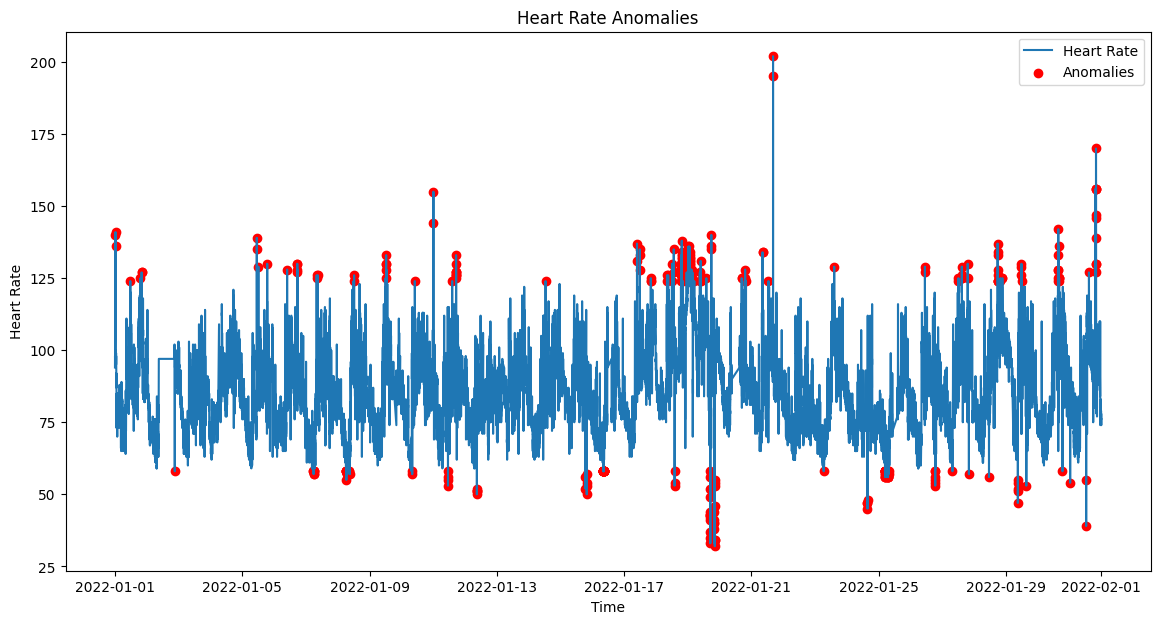

In [25]:
# Visualize anomalies
plt.figure(figsize=(14, 7))
plt.plot(heartrate_df.index, heartrate_df['heartrate'], label='Heart Rate')
plt.scatter(anomalies.index, anomalies['heartrate'], color='red', label='Anomalies')
plt.title('Heart Rate Anomalies')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.legend()
plt.show()

In [26]:
# Sleep_Steps_Analysis

In [27]:
# Load data
sleep_df = pd.read_csv('Downloads/sleep.csv')
steps_df = pd.read_csv('Downloads/steps.csv') 

# Convert to datetime
sleep_df['Timestamp'] = pd.to_datetime(sleep_df['Timestamp'])
steps_df['datetime'] = pd.to_datetime(steps_df['datetime'], format='%d/%m/%y %H:%M')

In [28]:
# Analyze sleep interruptions
sleep_df['wake_flag'] = sleep_df['Sleep Type'] == 'wake'
wake_periods = sleep_df[sleep_df['wake_flag']]

# Calculate sleep efficiency
total_sleep_time = sleep_df[sleep_df['Sleep Type'] != 'wake']['Minutes Asleep'].sum()
time_in_bed = (sleep_df['Timestamp'].max() - sleep_df['Timestamp'].min()).total_seconds() / 60
sleep_efficiency = total_sleep_time / time_in_bed

In [29]:
# Analyze steps data
steps_df['is_active'] = steps_df['steps'] > 0
active_periods = steps_df[steps_df['is_active']]

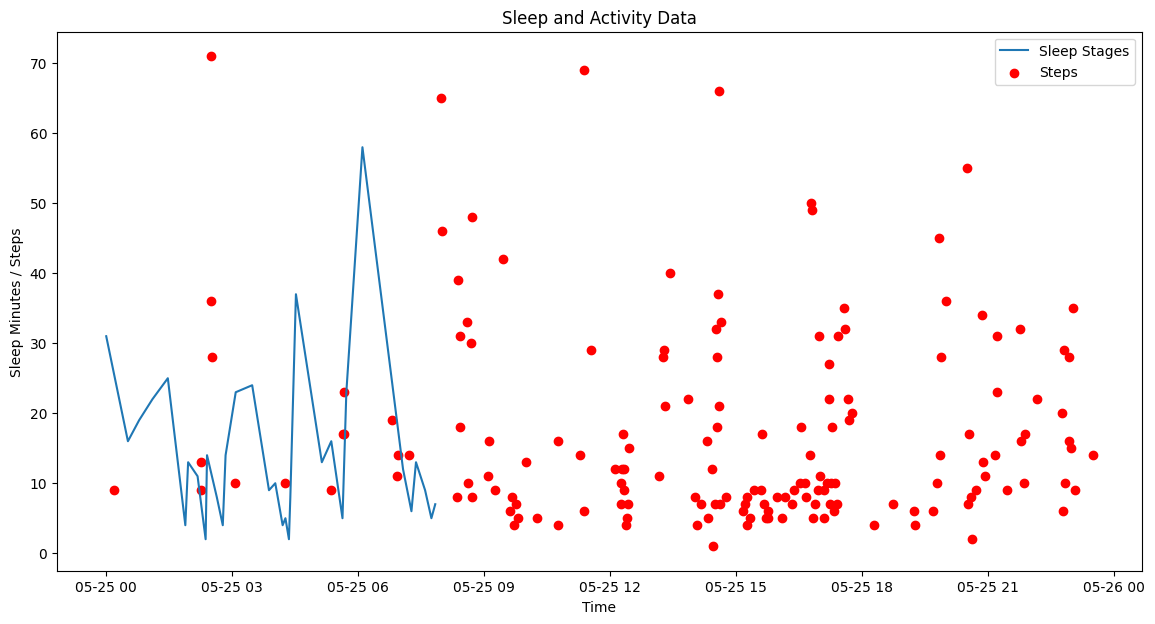

In [30]:
# Integrate sleep and steps data
merged_df = pd.merge_asof(sleep_df, steps_df, left_on='Timestamp', right_on='datetime', direction='nearest')

# Correlate steps with sleep interruptions
merged_df['activity_during_wake'] = (merged_df['wake_flag'] & merged_df['is_active'])

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(sleep_df['Timestamp'], sleep_df['Minutes Asleep'], label='Sleep Stages')
plt.scatter(active_periods['datetime'], active_periods['steps'], color='red', label='Steps')
plt.title('Sleep and Activity Data')
plt.xlabel('Time')
plt.ylabel('Sleep Minutes / Steps')
plt.legend()
plt.show()

In [31]:
print(f"Sleep Efficiency: {sleep_efficiency:.2f}")
print("Potential reasons for sleep interruptions: physical activity during wake periods.")
print("Health implications: Poor sleep quality can lead to increased stress, lower cognitive function, and long-term health issues.")

Sleep Efficiency: 0.86
Potential reasons for sleep interruptions: physical activity during wake periods.
Health implications: Poor sleep quality can lead to increased stress, lower cognitive function, and long-term health issues.
